In [3]:
import pandas as pd

In [4]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# categoriza a partir das string a coluna genres
generos = filmes.genres.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# concatena os arrays de lado 
filmes = pd.concat([filmes,generos],axis = 1)
filmes.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# escala os generos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
print(generos_escalados)

[[-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 ...
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995  2.0807022  -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]]


/home/pedro/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pedro/anaconda2/lib/python2.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
# agrupa os generos dos filmes
from sklearn.cluster import KMeans

# agrupa em n_clusters grupos diferentes
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
# olha os centroides de cada atributo generos para cada um dos 3 clusters
# exemplo no grupo 1 temos que 1.59440906 dos filmes desse grupo tendem a ser do genero 'Thriller'
print(generos.columns)
print(modelo.cluster_centers_)

Index([u'(no genres listed)', u'Action', u'Adventure', u'Animation',
       u'Children', u'Comedy', u'Crime', u'Documentary', u'Drama', u'Fantasy',
       u'Film-Noir', u'Horror', u'IMAX', u'Musical', u'Mystery', u'Romance',
       u'Sci-Fi', u'Thriller', u'War', u'Western'],
      dtype='object')
[[-0.05917995  0.71159953  1.68079531  1.34363367  1.24822722 -0.12550572
  -0.28703674 -0.21056078 -0.60943973  1.02608191 -0.08727852 -0.24069166
   0.61201711  0.15951284 -0.14908223 -0.29296324  0.64379747 -0.21675995
  -0.14642225 -0.06555534]
 [ 0.06401045  0.03712774 -0.27717468 -0.2419345  -0.25095049 -0.72934835
   0.21659147  0.19305546  0.29478304 -0.18609576  0.09813132  0.24258181
  -0.08610682 -0.11091491  0.20227899 -0.34506705 -0.00624156  0.42445246
   0.14254992  0.04736718]
 [-0.05917995 -0.31668877 -0.28298692 -0.2002716  -0.15266545  0.9770706
  -0.16739298 -0.16634534 -0.14500638 -0.15123248 -0.09203089 -0.2180614
  -0.12192916  0.08098011 -0.20137292  0.55068973 -0.2357

In [10]:
# convertemos o conjunto de grupos para um dataframe
# e renomeia as colunas para o nome dos generos

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.711600,1.680795,1.343634,1.248227,-0.125506,-0.287037,-0.210561,-0.609440,1.026082,-0.087279,-0.240692,0.612017,0.159513,-0.149082,-0.292963,0.643797,-0.216760,-0.146422,-0.065555
1,0.06401,0.037128,-0.277175,-0.241935,-0.250950,-0.729348,0.216591,0.193055,0.294783,-0.186096,0.098131,0.242582,-0.086107,-0.110915,0.202279,-0.345067,-0.006242,0.424452,0.142550,0.047367
2,-0.05918,-0.316689,-0.282987,-0.200272,-0.152665,0.977071,-0.167393,-0.166345,-0.145006,-0.151232,-0.092031,-0.218061,-0.121929,0.080980,-0.201373,0.550690,-0.235748,-0.458916,-0.126255,-0.035555


In [11]:
# plotamos um grafico de barras

grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,25),
                           sharex=False)

# Control + Enter para plotar

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c1d4e1190>,
      dtype=object)

In [12]:
# reduzimos o conjunto de generos escalados para 2 dimensões
# esse metodo eh lento

from sklearn.manifold import TSNE
tsne = TSNE()
visual = tsne.fit_transform(generos_escalados)
visual

array([[ 71.74732  ,   9.743709 ],
       [-61.765858 ,  -7.7405376],
       [ 12.165708 ,  31.972975 ],
       ...,
       [  5.08834  ,   2.118321 ],
       [ 32.115585 ,  39.77351  ],
       [-26.783655 ,  23.957432 ]], dtype=float32)

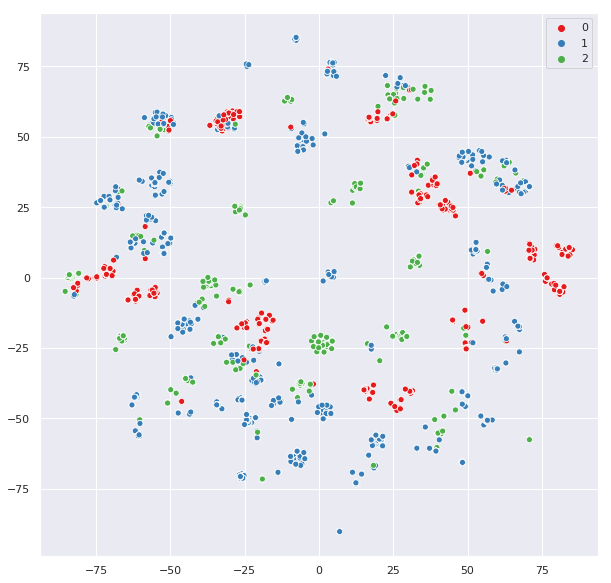

In [13]:
# plotamos os generos escalados

import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x = visual[:,0],
                y = visual[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1',3))

# quando reduzimos a dimensionalidade - 
# perdemos informações sobre como os dados estão dispostos. 
# eh visivel isso pois existem pontos de cores diferentes proximos entre si

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c4c042690>,
      dtype=object)

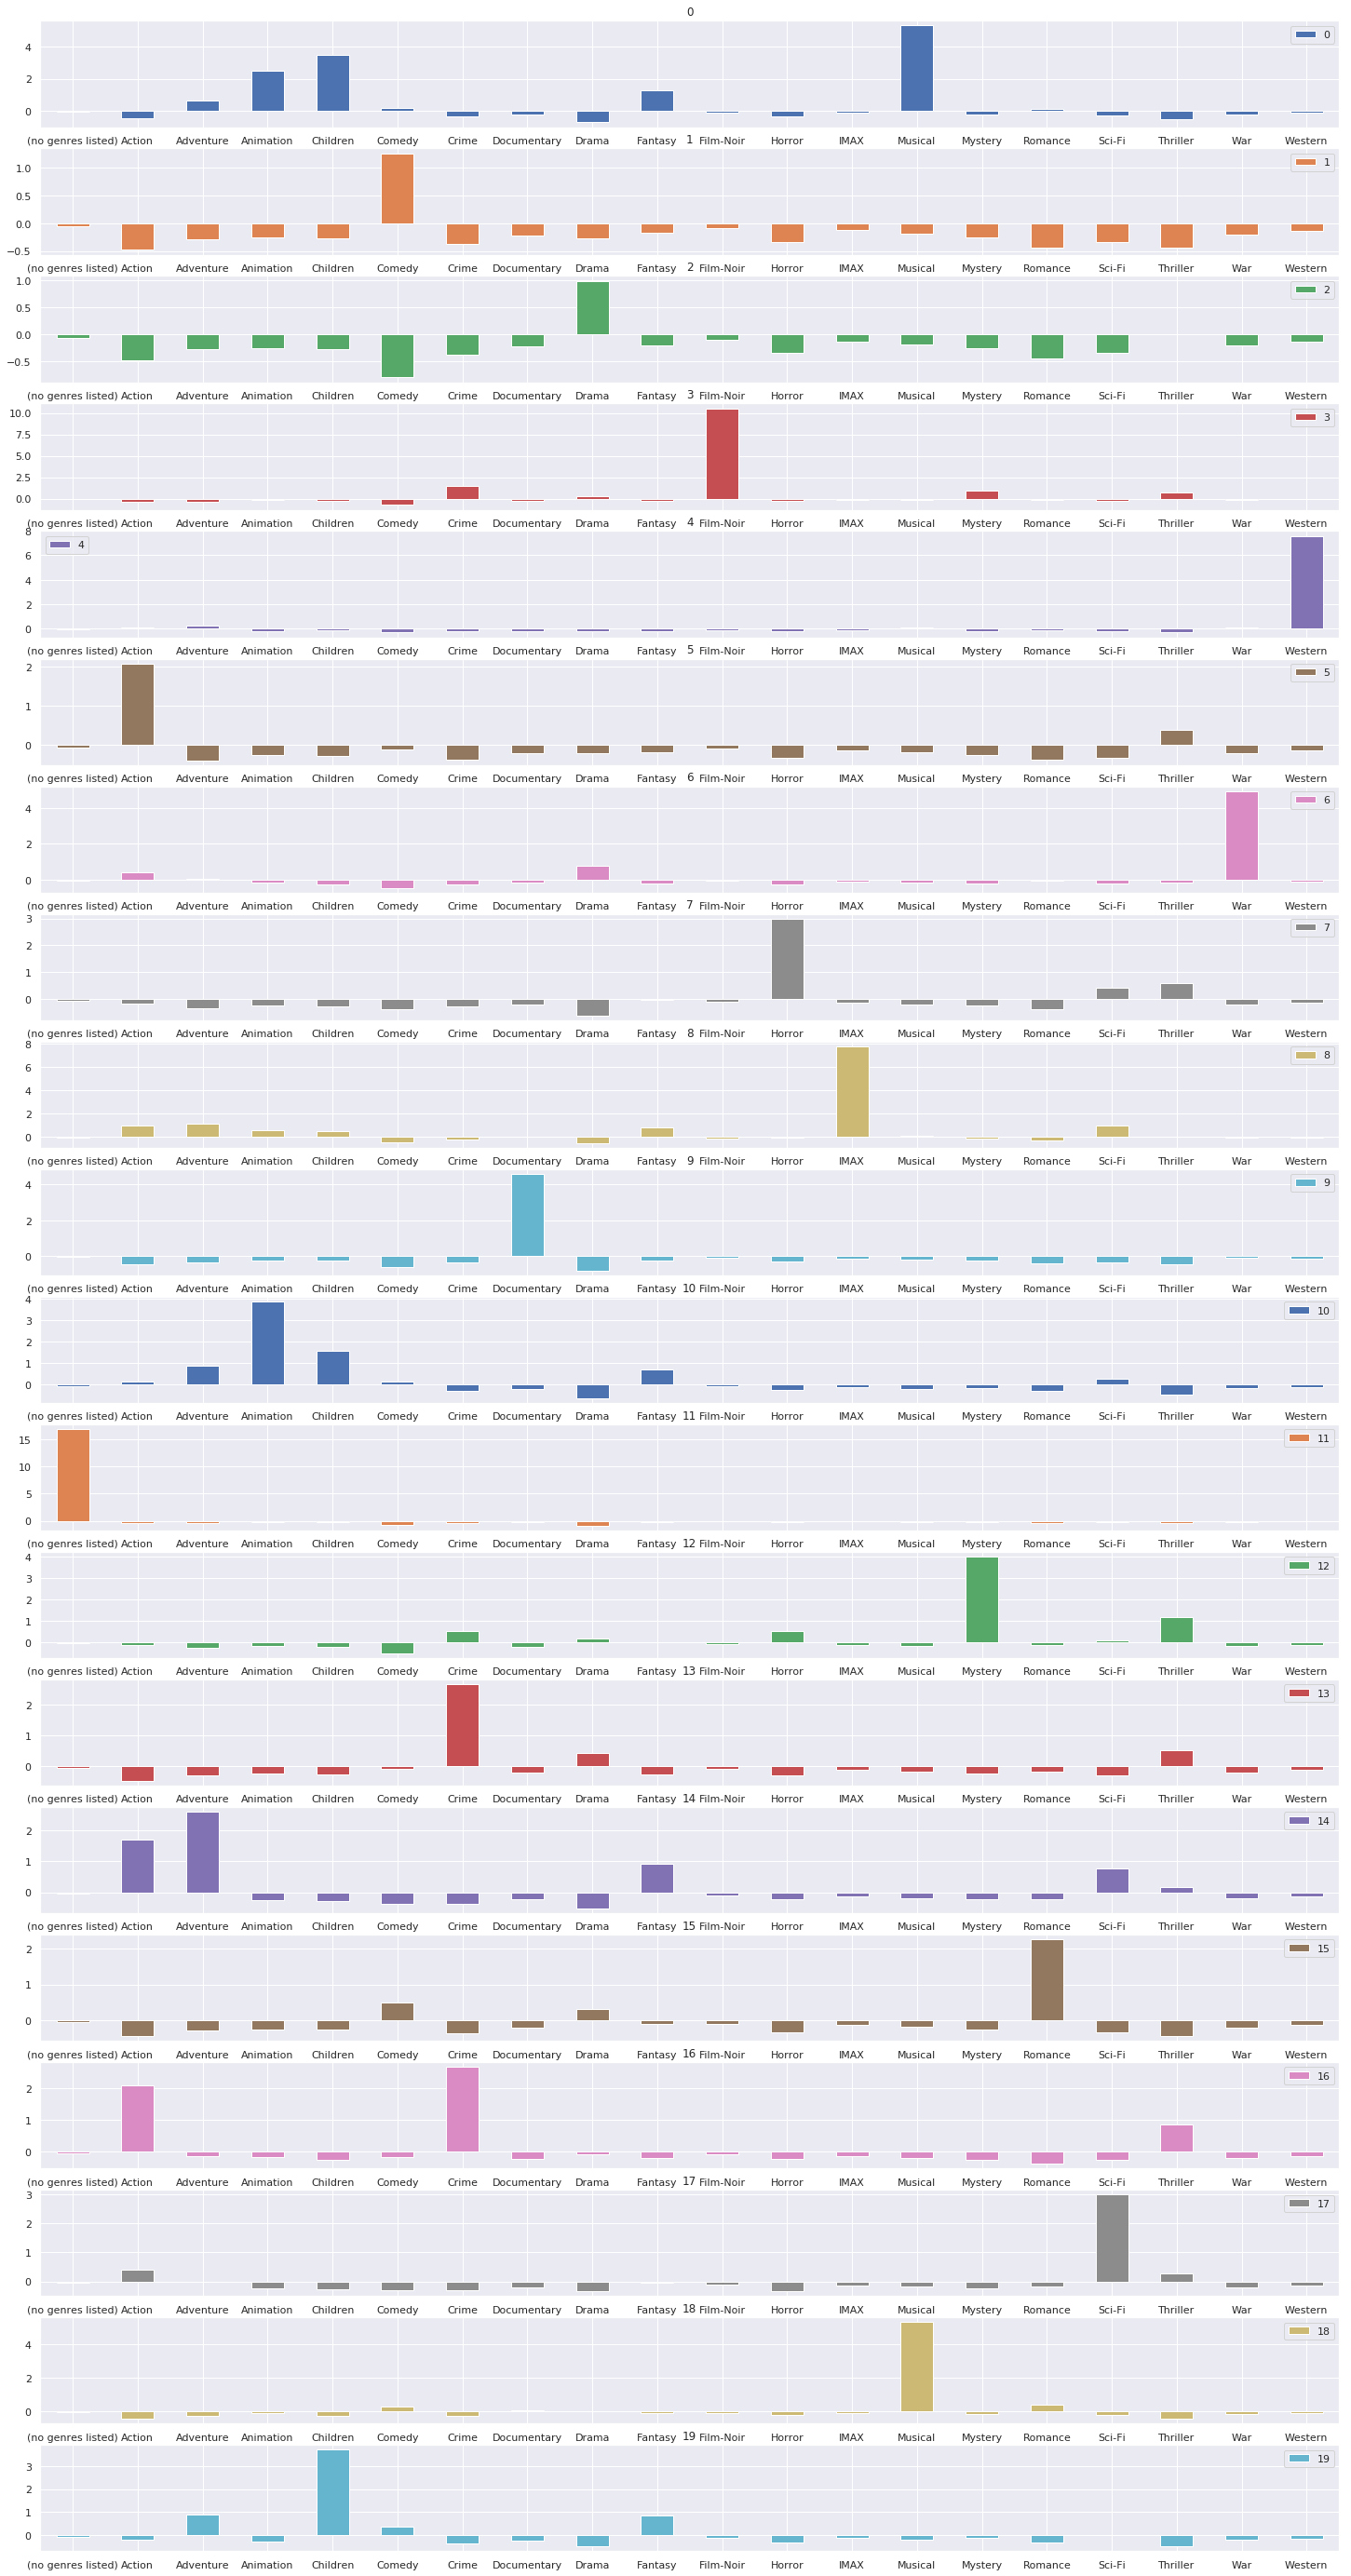

In [17]:
# agrupa os generos dos filmes
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)
grupos.transpose().plot.bar(subplots=True,
                           figsize=(25,50),
                           sharex=False,
                           rot=0)

In [ ]:
# definimos uma funcao para nos retornar o erro 
# o erro eh justamente a distancia media dos pontos ( filmes ) do centroid ( classificacao de filmes no grupo)

def km(numero_clusters,generos):
    modelo = KMeans(n_clusters = numero_clusters)
    modelo.fit(generos)
    erro = modelo.inertia_
    
    return er